In [1]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

import torch
torch.cuda.device_count()

1

In [2]:
annot = pd.read_csv('annot.csv')
imgs = pd.read_csv('img.csv')
img_fns = glob('./train_val_images/train_images/*')

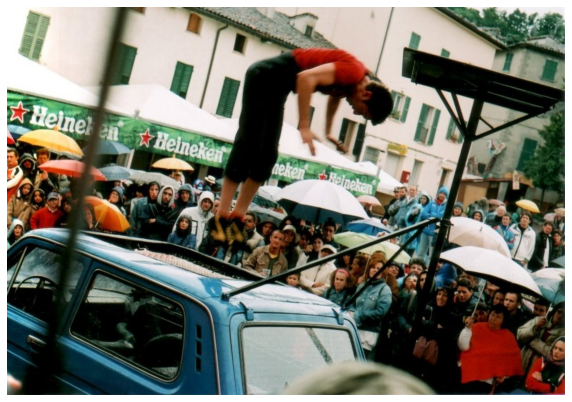

,Unnamed: 0,id,image_id,bbox,utf8_string,points,area
141559,141559,0002d070329eb0fc_1,0002d070329eb0fc,"[945.54, 415.16, 15.4, 10.8]",.,"[945.74, 415.16, 960.74, 417.56, 960.94, 425.9...",166.32
141560,141560,0002d070329eb0fc_2,0002d070329eb0fc,"[929.74, 414.16, 12.8, 7.9]",.,"[929.74, 414.16, 942.24, 414.56, 942.54, 421.8...",101.12
141561,141561,0002d070329eb0fc_3,0002d070329eb0fc,"[265.04, 221.88, 139.45, 68.51]",Heineken®,"[274.14, 221.88, 404.49, 254.02, 399.03, 290.3...",9553.72
141562,141562,0002d070329eb0fc_4,0002d070329eb0fc,"[35.9, 167.67, 184.56, 83.92]",Heineken®,"[47.74, 167.67, 220.46, 200.4, 211.06, 251.59,...",15488.28
141563,141563,0002d070329eb0fc_5,0002d070329eb0fc,"[481.52, 270.94, 75.48, 49.72]",neken®,"[495.47, 270.94, 557.0, 284.89, 548.21, 320.66...",3752.87
141564,141564,0002d070329eb0fc_6,0002d070329eb0fc,"[584.89, 295.5, 97.31, 53.66]",Heineken®,"[591.26, 295.5, 682.2, 315.2, 676.75, 349.16, ...",5221.65


In [3]:
image = img_fns[11]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(image))
ax.axis('off')
plt.show()
image_id = image.split("/")[2].split('\\')[1].split('.')[0]
annot.query('image_id == @image_id')

In [4]:
import easyocr

reader = easyocr.Reader(['en'], gpu = True)

In [5]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\Juanma\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Juanma\.keras-ocr\crnn_kurapan.h5


In [6]:
import random
random_set = random.sample(img_fns, 100)

In [7]:
easy_score = 0
keras_score = 0
count = 0
total = 0
for image in random_set:
    count+=1
    print(count)
    image_id = image.split("/")[2].split('\\')[1].split('.')[0]
    print(f"id: {image_id} \n")
    texts = [text.lower() for text in list(annot.query('image_id == @image_id')['utf8_string']) if text != '.']
    print(f"gt: {texts} \n")
    easy_op = [text[1].lower() for text in reader.readtext(plt.imread(image))]
    print(f"easy: {easy_op} \n")
    keras_op = [text[0].lower() for text in pipeline.recognize([keras_ocr.tools.read(image)])[0]]
    print(f"keras: {keras_op} \n")
    common_words_easy = set(texts).intersection(set(easy_op))
    common_words_keras = set(texts).intersection(set(keras_op))
    easy_score+=len(common_words_easy)
    keras_score+=len(common_words_keras)
    total += len(set(texts))
print("EasyOCR score:", easy_score)
print("KerasOCR score:", keras_score)
print("Total words:", total)

1
id: 0ea6ee71b645c098 

gt: [] 

easy: ['driving', 'isback.', 'introducing', 'what moves you', 'iconine5', 'amar'] 

1/1 [==============================] - 1s 1s/step
keras: ['driving', 'back', 'is', 'introducing', 'you', 'frs', 'what', 'moves', 'scion', 'amar'] 

2
id: e896ae2b6722441d 

gt: ['cardinals', 'moe', '2008', 'summer', 'adobe'] 

easy: ['@z', 'moe'] 

1/1 [==============================] - 0s 105ms/step
keras: ['soe', 'set', 'gadinaka', 'ca'] 

3
id: 400c75f57c9bc6f7 

gt: ['used', 'book', 'sale', 'the', 'university', 'library', 'is', 'selling', 'several', 'thousand', 'bently', 'used', 'books,', 'including', 'collection.', 'the', 'for', 'needed', 'not', 'books', 'other', 'and', 'titles,', 'superseded', 'and', 'duplicate', 'among', 'the', 'variety', 'of', 'offerings', 'this', 'year', 'are', 'duplicate', 'books', 'from', 'the', 'social', 'work', 'library,', 'engineering', 'and', 'architecture', 'art,', 'from', 'titles', 'selected', 'library,', 'some', 'labadie', 'books', 'an

easy: ['orders accepted the day following the race', '[nulle', 'mort', 'cornalnios,', '7', 'noie', 'utt =', 'jisted krion,', 'feenttrct', 'eddnat', 'tolon>', 'scot prices', 'brief', 'of the', 'include', 'gate admission', 'indianapolis motor speedway', 'hedlinapall', 'covu', 'otd', 'ddock pey', 'ordcrs accepted', 'the day following', 'fucg', 'a', 'ordors must b0', 'in*', 'aecompanied by', 'certiflad check', 'money order;', 'euaiedaueetcan', 'enpacil', 'mako three', 'nctititt', 'snetua', 'nun}', 'choices', 'stande;', 'tantnru', 'mr; hulman', 'hesa', 'nchola', 'culmt', 'uk', 'tickets', 'plahiemu', 'uivi', 'mallad', 'joon', '(6it" jal', 'acinr', '~co', '[acak', 'unthe', 'hnilel', 'convlneed', 'ln', 'iod €4n', 'moxatel', 'inbelt #hrne thrte ab', 'from the printers:', 'augins', 'eon', 'ata', 'immcdlately', 'tnrcc', 'mlllon_', 'otun `', 'cniche', 'yen', 'ray halroun pt 44', 'anolhrr leel', 'jorint tcu', 'drnher', 'jaaaear', 'an', 'anan(ll', 'race starts at(0:00', 'tksut [allt', 'masharpo(cent

easy: ['babasonicos', 'attaque 77', 'los bunkers', 'makiza', 'sinergia', 'los miserables', 'o8feb', 'iofeb', 'laserena', "vinadelmar'", 'e3ila p', 'tla d', 'kosh', 'p07jzrz', 'w ww', 'crushpo werm usic. €7', '2', '2', 's5.000', '5', 'erbada', '0 cish lbl', 'eve n', 'fm', 'tit', '4101.7', 'www mhik', 'c', 'el mercurio', 'pub', 'feria', 'disco', 'pris', 'el huelle', 'hie', 'la serana', 'coe', '05 $ [ 9 0', 'enn', 'coaae', '3aec5 8ta', '4065 ba 7i zetd', 'panceen ee', 'eo', 'eonoe', 'orarse_'] 

4/4 [==============================] - 3s 746ms/step
keras: ['babasonicos', 'attaque', '77', 'los', 'bunkers', 'makiza', 'miserables', 'sinergia', 'los', 'lofeb', 'obfeb', 'laserena', 'vinadelmar', 'esteaaprtade', 'ood', 'tosh', 'oranse', 'pmcic', 'crushpowermusic', 'ce', 'www', 's5000', '2eo', 'entada', 'orush', 'cnuish', 'ligo', '0', 'un', 'evento', 'fm', 'toz', 'mercurio', 'el', 'wwwimhit', 'cl', 'sota', 'rub', 'feria', 'disco', 'esulle', 'pars', 'serana', 'la', 'shen', 'fed', 'ssene', 'c', 'u'

easy: ['lute', 'raply', 'clo:e', 'new', 'f8', '76', '65', 'fa', '9', 'media', 'bluetooth', 'twd', 'open'] 

1/1 [==============================] - 0s 409ms/step
keras: ['l', 'd', 'media', 'io', 'ate', 'bluetooth', 'ewo', 'roply', 'clons', 'opan', 'new', 'e', 'a', '8', 'g', 'a', 'de'] 

30
id: 1b5a99baf5141f9a 

gt: ['jim', 'beam', 'the', "world's", 'no.1', 'bourbon', 'jim', 'beam', 'beam', 'formula.', '.a', 'standrd', 'since', '1795', 'bourbon', 'entucky', 'staight', 'b.durbon', 'whiskey', "jimnotverticalstackedbeamnotverticalstackedthenotverticalstackedworld'snotverticalstackedno.1notverticalstackedbourbonnotverticalstackedjimnotverticalstackedbeamnotverticalstackedbeamnotverticalstackedformula.notverticalstacked.anotverticalstackedstandrdnotverticalstackedsincenotverticalstacked1795notverticalstackedbourbon", 'ma'] 

easy: ['bea', 'tke world 5 no 1 bourbon', 'hu', '8', 'bourbon', 'cmivekv siraight', 'bdu rb@n whisret', 'ii a', '734', 'rea"'] 

1/1 [==============================] - 0

easy: ['standard', 'sparhlers', 'fireworks ', 'in ld_', 'and 2d-', 'boxes.', 'id. packets:', 'ejults', 'jumbo gd. each', 'giant 1d. each', 'standarz acrobats', 'fireworks', 'one', 'penny', 'each', 'resuld', 'siandard little demon', 'cannons', 'ejults', 'fireworks', '6d.', 'per   dozen', 'skandar', 'litalf pennns', '8', '03', 'and', 'penny', '13', 'deeeus]', '1', '6', '9', '1', 'i', 'for', 'big bangsl'] 

3/3 [==============================] - 2s 389ms/step
keras: ['sparklers', 'standard', 'tdard', 'for', 'the', 'best', 'flreworks', 'esults', 'in', 'ld', 'and', '2d', 'boxes', 'sd', 'packets', 'jumbo', 'zd', 'each', 'giant', 'ld', 'each', 'standard', 'acrobats', 'he', 'beste', 'fireworks', 'results', 'one', 'penny', 'each', 'little', 'demon', 'standard', 'for', 'cannons', 'the', 'best', 'fireworks', 'results', 'gd', 'dozen', 'per', 'standard', 'e', 's', '', '', 'halfpenny', 'e', 'little', 'demons', 's', 'and', 'penny', '', 's', 'big', '', 's', 's', 'demons', '', 'for', 'bangsi', 'big'] 


14/14 [==============================] - 10s 696ms/step
keras: ['useless', 'acuum', 'sn', 'a', 'sunea', 'the', 'suvert', 'ac', 'ac', 'int', 'lhear', 'only', 'ure', 'we', 're', 'getting', 'invention', 'electricity', 'tube', 'the', 'other', 'fow', 'to', 'half', 'g', 'you', 'but', 'half', 'well', 'diodel', 'thens', 'the', 'time', 'sas', 'we', 'only', 'that', 'stuff', 'irrent', 'an', 'actually', 'pay', 'aows', 'the', 'ofcourse', 'horl', 'into', 'power', 'everybody', 'the', 'our', 'off', 'house', 'compa', 'g', 'of', 'part', 'cach', 'and', 'if', 'cycle', 'its', 'it', 'thats', 'maybe', 'doesnt', 'changes', 'at', 'not', 'ac', 'a', 'into', 'cost', 'pulsating', 'said', 'us', 'wha', 'ally', 'dc', 'anything', 'know', 'is', 'bur', 'thats', 'i', 'know', 'called', 'a', 'you', 'ss', 'great', 'half', 're', 'a', 'way', 'whats', 'ahead', 'a', 'b', 'wave', 'bad', 'way', 'of', 'to', 'halfewave', 'use', 'recti', 'use', 'y', 'a', 'me', 'you', 'l', 'for', 'application', 'rectifer', 've', 'example', 'already',

easy: ['uscocmnc', 'expaeso', 'suboaedntnnleihtetaco', 'el deporte blanco', 'iste sahado', 'aenemosmc', 'deles deportes quciecuiiemmg-', 'desireza ueod dadv buenos', 'accion', '[ccas', 'cce', 'resultados ari', 'coyotes la tiene facil, pero muestra cautela', "'no nos", 'podemos', 'a', 'seguir la racha]', 'confiar"', 'curoles(ojcm;', '4[numaeneineioc', 'dcnacntan', 'vsm8s', 'jugaran', 'te inuitamosa0 jl', '34', '29', '24', 'acuqasjaruanda', 'dobs copoles', '26', 'iboasesdcbles', 'arado? pierio?', '33', 'licicnacos qu', 'aeespreso', 'wnciont', 'ip icheay herinosuole&4n4', 'rcimticgoueuca', 'reaccion naranja', 'uedb', '38', 'otaod', 'gedrfest', 'george best', 'eaccmt', '41946', '25dunavicinbredl7005', 'mcadiecr arin lul tclistinorirlndcs 6c'] 

4/4 [==============================] - 3s 749ms/step
keras: ['expreso', 'deporte', 'blanco', 'seccion', 'c', 'el', 'sbelo', 'toc', 'coe', 'este', 'sabado', 'de', 'ninos', 'tenemos', 'uno', 'accion', 'oe', 'los', 'deporles', 'quereoueien', 'me', 'des

1/1 [==============================] - 0s 137ms/step
keras: ['pr', '0', 'lig7a7', 'tax', 'd'] 

66
id: abaf68e381d2eb90 

gt: ['grolsch'] 

easy: ['tescr'] 

1/1 [==============================] - 0s 45ms/step
keras: ['groesch'] 

67
id: 91c3e88cbdb62c42 

gt: ['steak', 'n', 'shake', 'shake', 'n', 'staek', 'shake', 'n', 'steak'] 

easy: ['n', 'jl', 'eutw', 'ta l', 'steak !', 'shake'] 

1/1 [==============================] - 0s 270ms/step
keras: ['steak', 'n', 'shake', 'cliw', 'ill', 'xta', 'ytas', 'c', 'sas', 'eak', 'stake'] 

68
id: c9959d2d4e77e27c 

gt: ['nokia', '16.04', 'settings', 'runkeeper', 'general', 'stèvé', 'ò', 'smìth', "you're", 'connected', 'to', 'runkeeper', '✓detect', 'pauses', 'when', 'upload', 'to', 'runkeeper', 'on', 'new', 'activities,', 'runkeeper', 'is', 'able', 'to', 'autodetect', 'pauses', 'and', 'update', 'your', 'data', 'accordingly', 'broadcast', 'live', 'activity', 'on', 'runkeeper', '⟵', '⟵', '⟶', 'lg', 'l', 'g', 'impostazioni', '16:03', 'runkeeper', 'gene

easy: ['12', 'cfl4', 'co', '3'] 

1/1 [==============================] - 0s 408ms/step
keras: ['12', '1', 's', 'a', 'saces', 'san', 'd', 'oy', 'f', 'ws', 'e', 's', 'h', 's', 'b', '6', 'os'] 

73
id: f994eedb765278ff 

gt: ['bendtner', '23', 'mirates', 'fly'] 

easy: ['(ndtnea', 'fly', '23', 'iltates'] 

1/1 [==============================] - 0s 135ms/step
keras: ['m', 'bendinep', 'g', 'fly', 'mtates'] 

74
id: 5893d774505cac11 

gt: ['98', 'oracle', 'idm', 'programming', 'in', 'scala:', 'a', 'comprehensive', 'step.by.step', 'guide', 'martin', 'odersky+', 'lex', 'spoon+', 'bill', 'veneers', 'scala', 'jolt', 'award', 'productivity', 'award', 'in', 'scala', 'scala', 'java,', 'ruby', '2'] 

easy: ['programming', 'scala:', 'cumnrahen', '520', 'de', 'martin odersky', 'lex spuun', 'eill', 'cnners', 'llcal', 'seala', '5si}', '"scala', 'jolt award', '357374,', 'prodonazu-t', '[33t7h8--77/7', 'award z #iri', 'wjwtei', 'ilrs eelst', 'tl', 'xv3uz3+0', '531,]', '191955', 'odozet', '5350s]', '0obd-#

2/2 [==============================] - 1s 34ms/step
keras: ['ibby', 'conditioned', 'ai', 'gho', 'paddock', 'motol', 'cowrt', 'philco', 'the', 'rostawrant', 'e', 'fad', 'ck', 'aaa', 'qlalin', 'u', 'h3o1', 'south', 's', 'route', '212', 'miles', 'mot', 'or', 'cours', 'manning', 'south', 'carolina', 'vnated', 'lourt', 'member', 'alll', 'tehe'] 

88
id: ef798a21fd8f8807 

gt: ['time', 'to', 'give?', '12', '6'] 

easy: ['hmeto che"'] 

1/1 [==============================] - 0s 135ms/step
keras: ['time', 'to', 'giv', 'l', '6'] 

89
id: 4a6271ab98fad9ac 

gt: ['argosy', 'nov.', '16', 'weekly', '10¢', '122', 'theodore', 'roscoe', 'speak', 'for', 'yourself.', 'john', 'quincy', 'dramatic', 'short', 'novel', 'of', 'america', 'in', 'the', 'making', 'norbert', 'holocaust', 'davis', 'house', 'thrill-', 'a-', 'second', 'story', 'of', 'mystery', 'and', 'adventure', 'bennett', 'foster', 'spurs', 'for', 'the', 'mustang', 'powerful', 'tale', 'who', 'gave', 'of', 'the', 'it', 'west', 'a', 'heart', 'and', '